# Fix pathing

In [1]:
import sys


sys.path.append("../..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))))


# Imports

In [3]:
import json
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Constants

In [4]:
FOLDER_NAMES = ["ex_5_test_GA"]
LABELS = ["Highest Activity"]
COLORS = [sns.color_palette("deep")[3]]
FACTORS = [1.75, 1.50, 1.25, 1.00, 0.75]

FOLDER_PATH = os.path.join(os.path.dirname(constants.PROJECT_DIRECTORY_PATH), "Simulator", "data")


# Methods

In [5]:
def load_json():
    datasets = []

    for folder_name in FOLDER_NAMES:
        dataset = []
        for factor in FACTORS:
            with open(os.path.join(FOLDER_PATH, folder_name, f"heuristic_numAmbulanceFactor={factor:.6f}.json"), 'r') as file:
                dataset.append(json.load(file))
            datasets.append(dataset)

    return datasets


In [6]:
def plot_fitness_for_objects(datasets, degree=2):
    plt.figure(figsize=(12, 6))

    all_fitness = []

    for dataset, label, color in zip(datasets, LABELS, COLORS):
        fitness = [data_object['fitness'][-1][0] * 100 for data_object in dataset]
        all_fitness.append(fitness)

        # Exclude the minimum points from the initial scatter plot
        all_points = [(time, fit) for time, fit in zip(FACTORS, fitness)]
        times, fits = zip(*all_points) if all_points else ([], [])
        plt.scatter(times, fits, color=color, label=f"{label}")

        # Fit and plot a polynomial
        coeffs = np.polyfit(FACTORS, fitness, degree)
        polynomial = np.poly1d(coeffs)
        plt.plot(FACTORS, polynomial(FACTORS), color=color)

    plt.xlabel('Factor')
    plt.ylabel('Violations (%)')
    title = 'Best Fitness Over Factors'
    plt.title(title, fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
    plt.grid(True)
    plt.legend(loc="upper right")

    plt.savefig(os.path.join(constants.PROJECT_DIRECTORY_PATH, "source", "analysis", "plots", title + ".png"), dpi=300, bbox_inches='tight')

    plt.show()


In [7]:
def plot_analysis(datasets, degree=2):
    plt.figure(figsize=(12, 6))

    for dataset, label, color in zip(datasets, LABELS, COLORS):
        fitness = [data_object['fitness'][-1][0] * 100 for data_object in dataset]

        coeffs = np.polyfit(FACTORS, fitness, degree)
        polynomial = np.poly1d(coeffs)

        # Derivative for Elbow method
        derivative = np.polyder(polynomial)
        second_derivative = np.polyder(derivative)
        critical_points = np.roots(second_derivative).real
        critical_points = critical_points[(critical_points >= min(FACTORS)) & (critical_points <= max(FACTORS))]
        if critical_points.size > 0:
            # Identify the Elbow point
            elbow_point = min(critical_points, key=lambda x: abs(derivative(x)))
            elbow_value = polynomial(elbow_point)

            plt.figure(figsize=(12, 6))
            plt.plot(FACTORS, polynomial(FACTORS), label=f"Polynomial Fit {label}", color=color)
            plt.scatter([elbow_point], [elbow_value], color='red', zorder=5)  # Mark the elbow point
            plt.title(f'Elbow Method for {label}')
            plt.xlabel('Factor')
            plt.ylabel('Fitness (%)')
            plt.grid(True)
            plt.legend(loc="upper right")
            plt.show()
        else:
            print("No valid critical points found for the Elbow method. Consider adjusting the polynomial degree.")

        # Cost-effectiveness analysis
        cost_effectiveness = [factor / fit for factor, fit in zip(FACTORS, fitness)]
        plt.figure(figsize=(12, 6))
        plt.plot(FACTORS, cost_effectiveness, color=color, label=f"Cost Effectiveness {label}")
        plt.xlabel('Factor')
        plt.ylabel('Resources per Unit of Performance (%)')
        plt.title('Cost Effectiveness Analysis')
        plt.grid(True)
        plt.legend(loc="upper right")
        plt.show()

        # Threshold Analysis - Add a threshold line to see when fitness meets a certain criterion
        threshold_fitness = 10  # Define a fitness threshold of interest
        plt.figure(figsize=(12, 6))
        plt.plot(FACTORS, fitness, color=color, label=f"Fitness {label}")
        plt.axhline(y=threshold_fitness, color='r', linestyle='--', label='Fitness Threshold')
        plt.title('Fitness Threshold Analysis')
        plt.xlabel('Factor')
        plt.ylabel('Fitness (%)')
        plt.grid(True)
        plt.legend(loc="upper right")
        plt.show()

        # Linear Regression
        model = LinearRegression()
        model.fit(np.array(FACTORS).reshape(-1, 1), fitness)
        predictions = model.predict(np.array(FACTORS).reshape(-1, 1))

        plt.figure(figsize=(12, 6))
        plt.scatter(FACTORS, fitness, color=color, label=f"Actual Fitness {label}")
        plt.plot(FACTORS, predictions, linestyle='--', color='black', label='Linear Regression Fit')
        plt.title(f'Linear Regression Analysis for {label}')
        plt.xlabel('Factor')
        plt.ylabel('Fitness (%)')
        plt.grid(True)
        plt.legend(loc="upper right")
        plt.show()


# Main

In [8]:
datasets = load_json()

for key, value in datasets[0][0].items():
    print(key)


avg_response_time_rural_a
avg_response_time_rural_h
avg_response_time_rural_v1
avg_response_time_urban_a
avg_response_time_urban_h
avg_response_time_urban_v1
diversity
fitness
percentage_violations
percentage_violations_rural
percentage_violations_urban


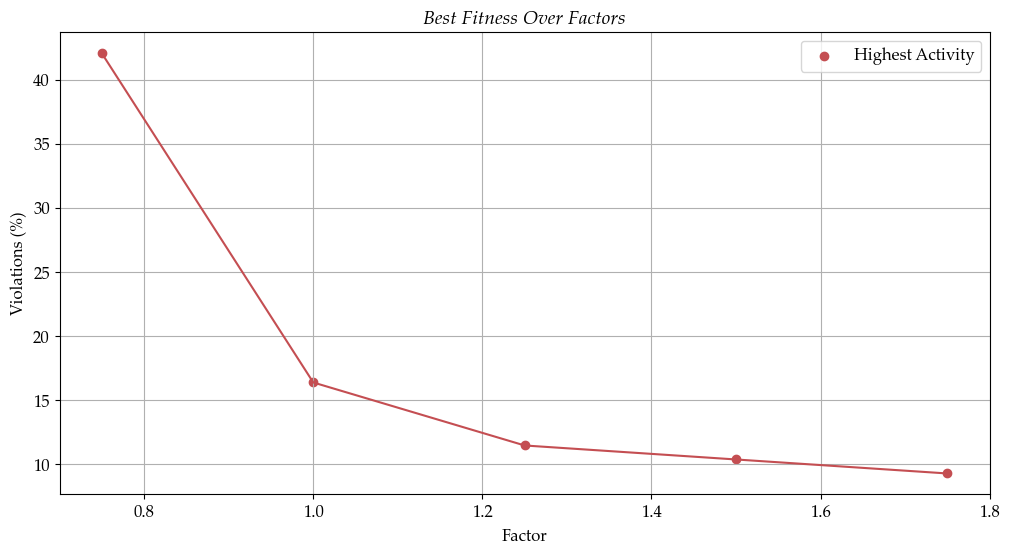

In [16]:
plot_fitness_for_objects(datasets, degree=4)


<Figure size 1200x600 with 0 Axes>

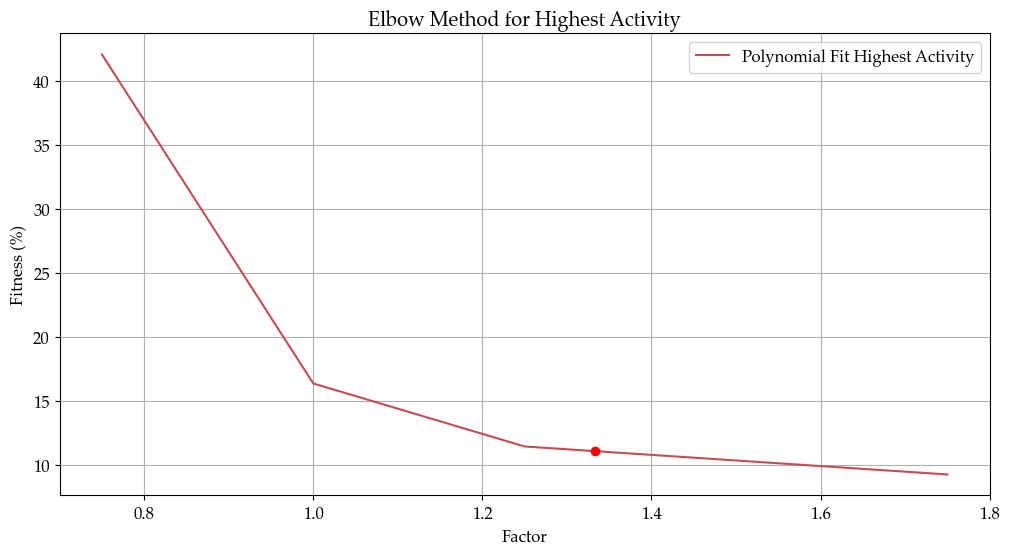

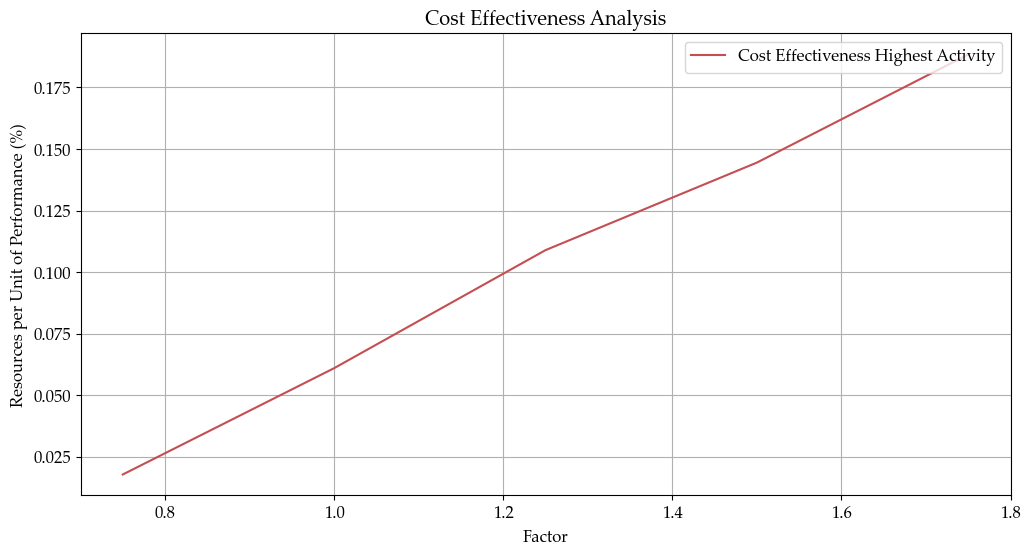

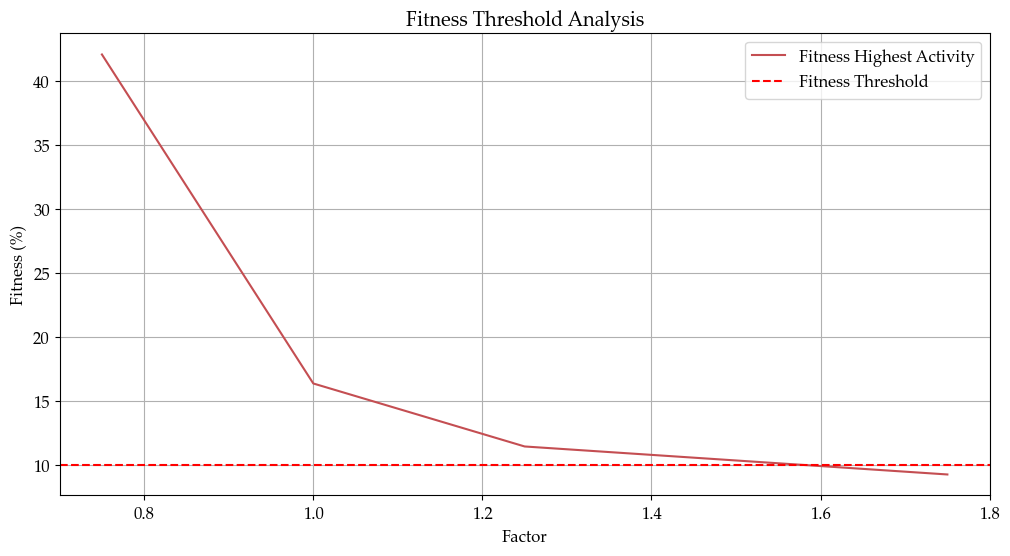

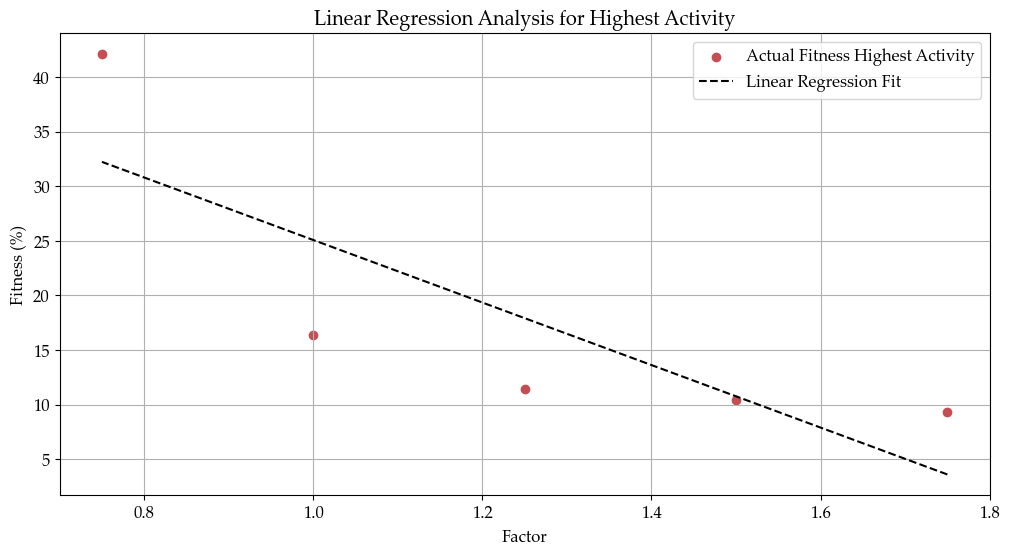

In [17]:
plot_analysis(datasets, degree=4)
